# Project 16 Auto_Insurance_Claims_Prediction 
--> Aim to Predict the Claim amount in auto insurance dataset.

## Lets Load Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [59]:
data=pd.read_csv("Auto_insuranceclaim.csv")
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [61]:
##checking null values
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [62]:
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


From the above we can see that there is a significant amount of difference between mean and max in claim amount, monthly premium auto and income.

In [6]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies'],
       dtype='object'),
 dtype('float64'): Index(['Claim Amount', 'Total Claim Amount'], dtype='object'),
 dtype('O'): Index(['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
       dtype='object')}

In [63]:
data_int=data[['Income', 'Monthly Premium Auto', 'Months Since Last Claim',
        'Months Since Policy Inception', 'Number of Open Complaints',
        'Number of Policies','Claim Amount', 'Total Claim Amount']].copy()

In [8]:
data_int.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Claim Amount,Total Claim Amount
0,56274,69,32,5,0,1,276.351928,384.811147
1,0,94,13,42,0,8,697.953590,1131.464935
2,48767,108,18,38,0,2,1288.743165,566.472247
3,0,106,18,65,0,7,764.586183,529.881344
4,43836,73,12,44,0,1,281.369258,138.130879


In [64]:
data_cat=data[['Customer', 'Country', 'State Code', 'State', 'Response', 'Coverage',
        'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
        'Location Code', 'Marital Status', 'Policy Type', 'Policy',
        'Claim Reason', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']].copy()

In [10]:
data_cat.head()

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,HB64268,US,KS,Kansas,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [65]:
data_cat.nunique()

Customer             9134
Country                 1
State Code              5
State                   5
Response                2
Coverage                3
Education               5
Effective To Date      59
EmploymentStatus        5
Gender                  2
Location Code           3
Marital Status          3
Policy Type             3
Policy                  9
Claim Reason            4
Sales Channel           4
Vehicle Class           6
Vehicle Size            3
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018ACE71A908>,
      dtype=object)

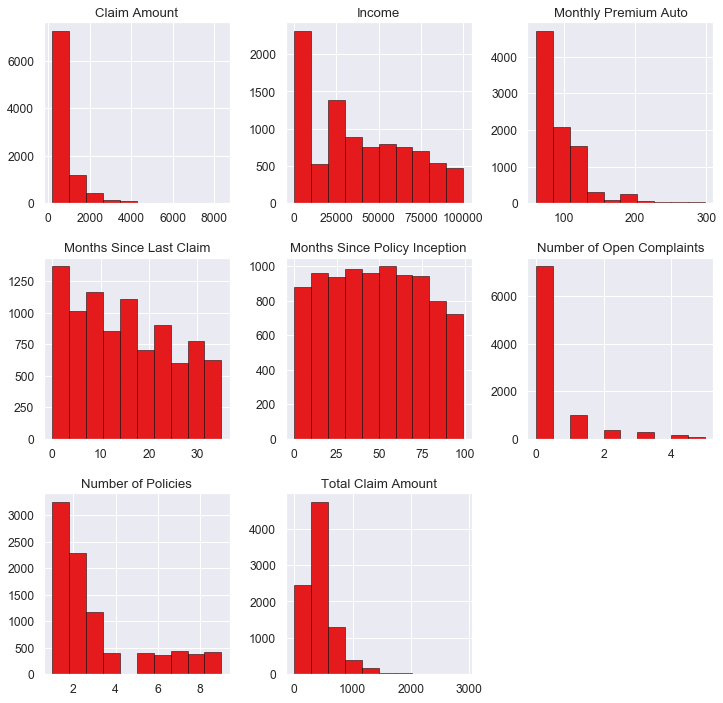

In [12]:
sns.set(style="darkgrid", palette='Set1', font_scale=1.1)
data.hist(figsize=(12,12),edgecolor='black',linewidth=0.5)

From the above we can observe a lot of things, that most of our features are positively skewed, and only few of the features are evenly distributed, and few of the features have outliers.

In [66]:
data.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [67]:
data_int['Income']=data_int['Income']+100

In [68]:
from scipy.stats import boxcox
data_int['Claim Amount']=boxcox(data_int['Claim Amount'],0)
data_int['Monthly Premium Auto']=boxcox(data_int['Monthly Premium Auto'],0)
data_int['Total Claim Amount']=boxcox(data_int['Total Claim Amount'],0)
data_int['Income']=boxcox(data_int['Income'],0)

## Lets do the EDA

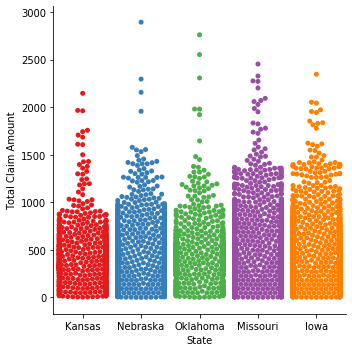

In [16]:
sns.catplot(x='State',y='Total Claim Amount',data=data,kind='swarm',palette='Set1')

From the above we can see that the Nebraska has highest claim amount, and missouri and Iowa have a major claim amount more than 1000, so they must have high range of vehicles.

<Figure size 1872x1872 with 0 Axes>

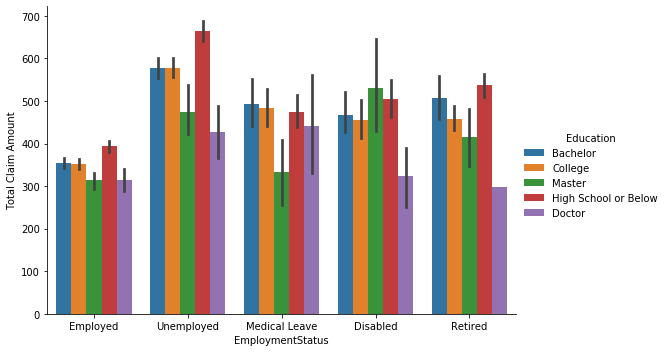

In [24]:
sns.catplot(x='EmploymentStatus',y='Total Claim Amount',hue='Education',data=data,kind='bar',aspect=1.5)

From the above we can see that people with highest claim amount have received a higher claim amount, however employed people had less claim amount, might be they had luxury car.

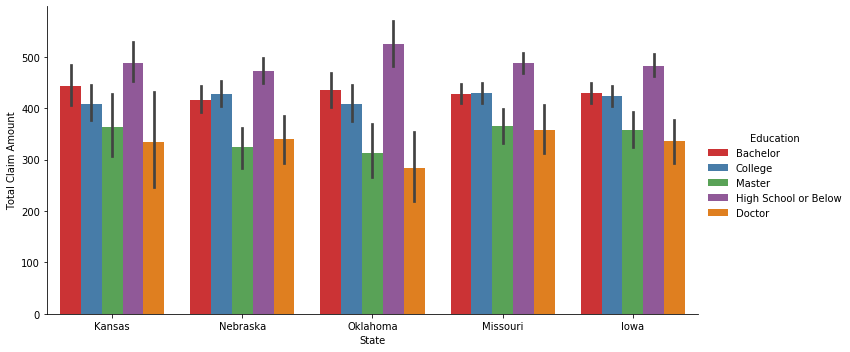

In [26]:
sns.catplot(x='State',y='Total Claim Amount',hue='Education',data=data,kind='bar',aspect=2,palette='Set1')

From the above we can see that Okhlahoma state has higher claim amount compared to others and people with education, high school or below, most of claim amount lies above 300.

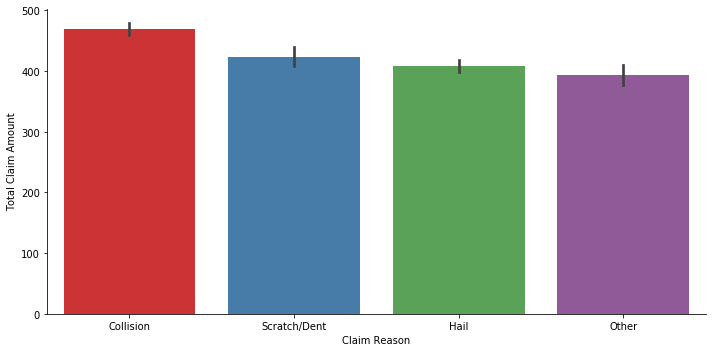

In [27]:
sns.catplot(x='Claim Reason',y='Total Claim Amount',data=data,kind='bar',aspect=2,palette="Set1")

From the above we can see that highest amount of the claims are due to collision, however we can see that their is negative linear relationship with claim reasons.

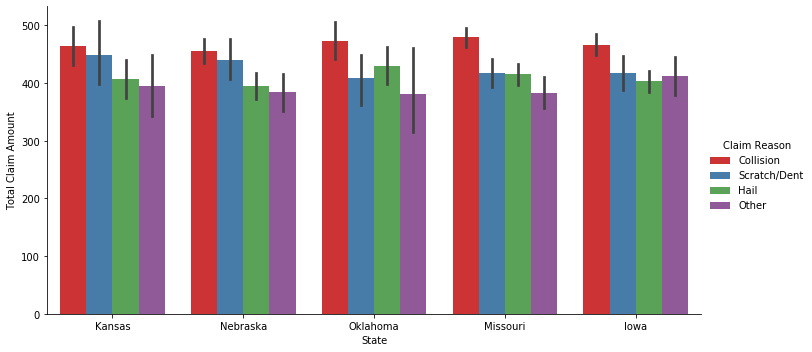

In [29]:
sns.catplot(x='State',y='Total Claim Amount',hue='Claim Reason',data=data,kind='bar',aspect=2,palette="Set1")

From the above we can see that most of the claims amounts in most of the state is due to collision for all the states, and for kansas state for scratch/dent the claim amount is almost compared to collision. 

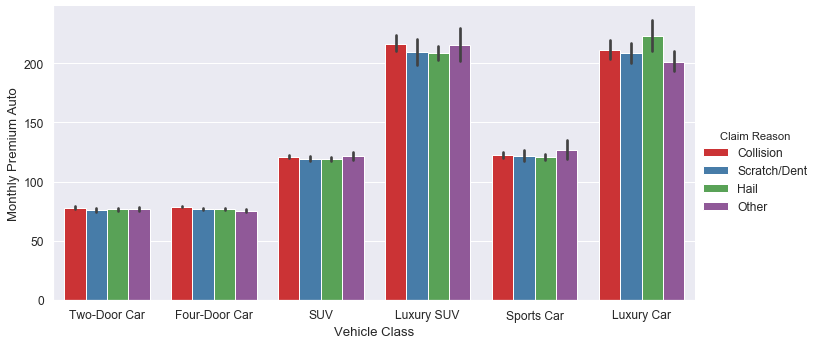

In [20]:
sns.catplot(x='Vehicle Class',y='Monthly Premium Auto',hue='Claim Reason',data=data,kind='bar',aspect=2,palette="Set1")

From the above we can see that luxury cars have higher premium more than 200 compared to others, and SUV's and Sports Car has considerably higher monthly premium for more than 100.

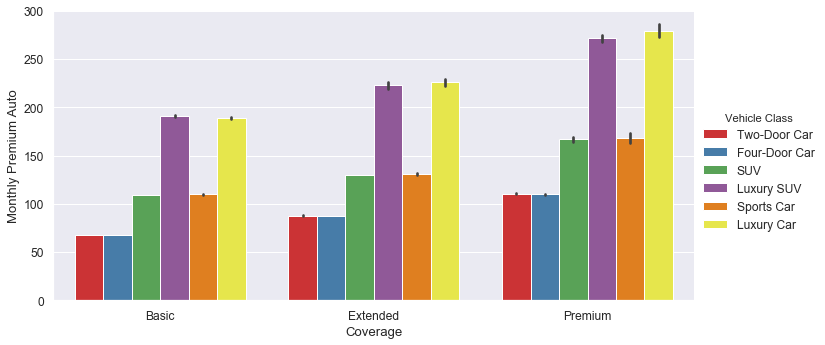

In [21]:
sns.catplot(x='Coverage',y='Monthly Premium Auto',hue='Vehicle Class',data=data,kind='bar',aspect=2,palette="Set1")

From the above we can see that the all types of cars have all types of coverages but premium varries with coverage, and as coverage increases the monthly premium also increases.

## Lets Treat our Categorical Variables

In [69]:
data_cat.drop(['Customer','Country','State Code'],axis=1,inplace=True)

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_cat['State']=le.fit_transform(data_cat['State'])
data_cat['Response']=le.fit_transform(data_cat['Response'])
data_cat['Coverage']=le.fit_transform(data_cat['Coverage'])
data_cat['Education']=le.fit_transform(data_cat['Education'])
data_cat['EmploymentStatus']=le.fit_transform(data_cat['EmploymentStatus'])
data_cat['Gender']=le.fit_transform(data_cat['Gender'])
data_cat['Location Code']=le.fit_transform(data_cat['Location Code'])
data_cat['Marital Status']=le.fit_transform(data_cat['Marital Status'])
data_cat['Policy Type']=le.fit_transform(data_cat['Policy Type'])
data_cat['Policy']=le.fit_transform(data_cat['Policy'])
data_cat['Claim Reason']=le.fit_transform(data_cat['Claim Reason'])
data_cat['Sales Channel']=le.fit_transform(data_cat['Sales Channel'])
data_cat['Vehicle Class']=le.fit_transform(data_cat['Vehicle Class'])
data_cat['Vehicle Size']=le.fit_transform(data_cat['Vehicle Size'])

In [71]:
data_cat['Effective Day']=data_cat['Effective To Date'].str.split('/').str[0].astype(int)
data_cat['Effective Month']=data_cat['Effective To Date'].str.split('/').str[1].astype(int)
data_cat.drop(['Effective To Date'],axis=1,inplace=True)

In [72]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
State               9134 non-null int32
Response            9134 non-null int32
Coverage            9134 non-null int32
Education           9134 non-null int32
EmploymentStatus    9134 non-null int32
Gender              9134 non-null int32
Location Code       9134 non-null int32
Marital Status      9134 non-null int32
Policy Type         9134 non-null int32
Policy              9134 non-null int32
Claim Reason        9134 non-null int32
Sales Channel       9134 non-null int32
Vehicle Class       9134 non-null int32
Vehicle Size        9134 non-null int32
Effective Day       9134 non-null int32
Effective Month     9134 non-null int32
dtypes: int32(16)
memory usage: 571.0 KB


In [73]:
data_final=pd.concat([data_int,data_cat],axis=1)
data_final.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Claim Amount,Total Claim Amount,State,Response,...,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,Effective Month
0,10.939763,4.234107,32,5,0,1,5.621675,5.952753,1,0,...,1,1,0,2,0,0,5,1,2,24
1,4.605170,4.543295,13,42,0,8,6.548153,7.031268,3,0,...,1,2,1,5,3,0,0,1,1,31
2,10.796858,4.682131,18,38,0,2,7.161423,6.339428,4,0,...,1,1,1,5,0,0,5,1,2,19
3,4.605170,4.663439,18,65,0,7,6.639335,6.272653,2,0,...,1,1,0,1,0,2,3,1,1,20
4,10.690489,4.290459,12,44,0,1,5.639668,4.928202,1,0,...,0,2,1,3,0,0,0,1,2,3


In [74]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Income                           9134 non-null float64
Monthly Premium Auto             9134 non-null float64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Claim Amount                     9134 non-null float64
Total Claim Amount               9134 non-null float64
State                            9134 non-null int32
Response                         9134 non-null int32
Coverage                         9134 non-null int32
Education                        9134 non-null int32
EmploymentStatus                 9134 non-null int32
Gender                           9134 non-null int32
Location Code                    9134 non-null int32
Marital Status                   9134 non-null int32
Policy Type                      9134

## Lets check the correlation of our final data

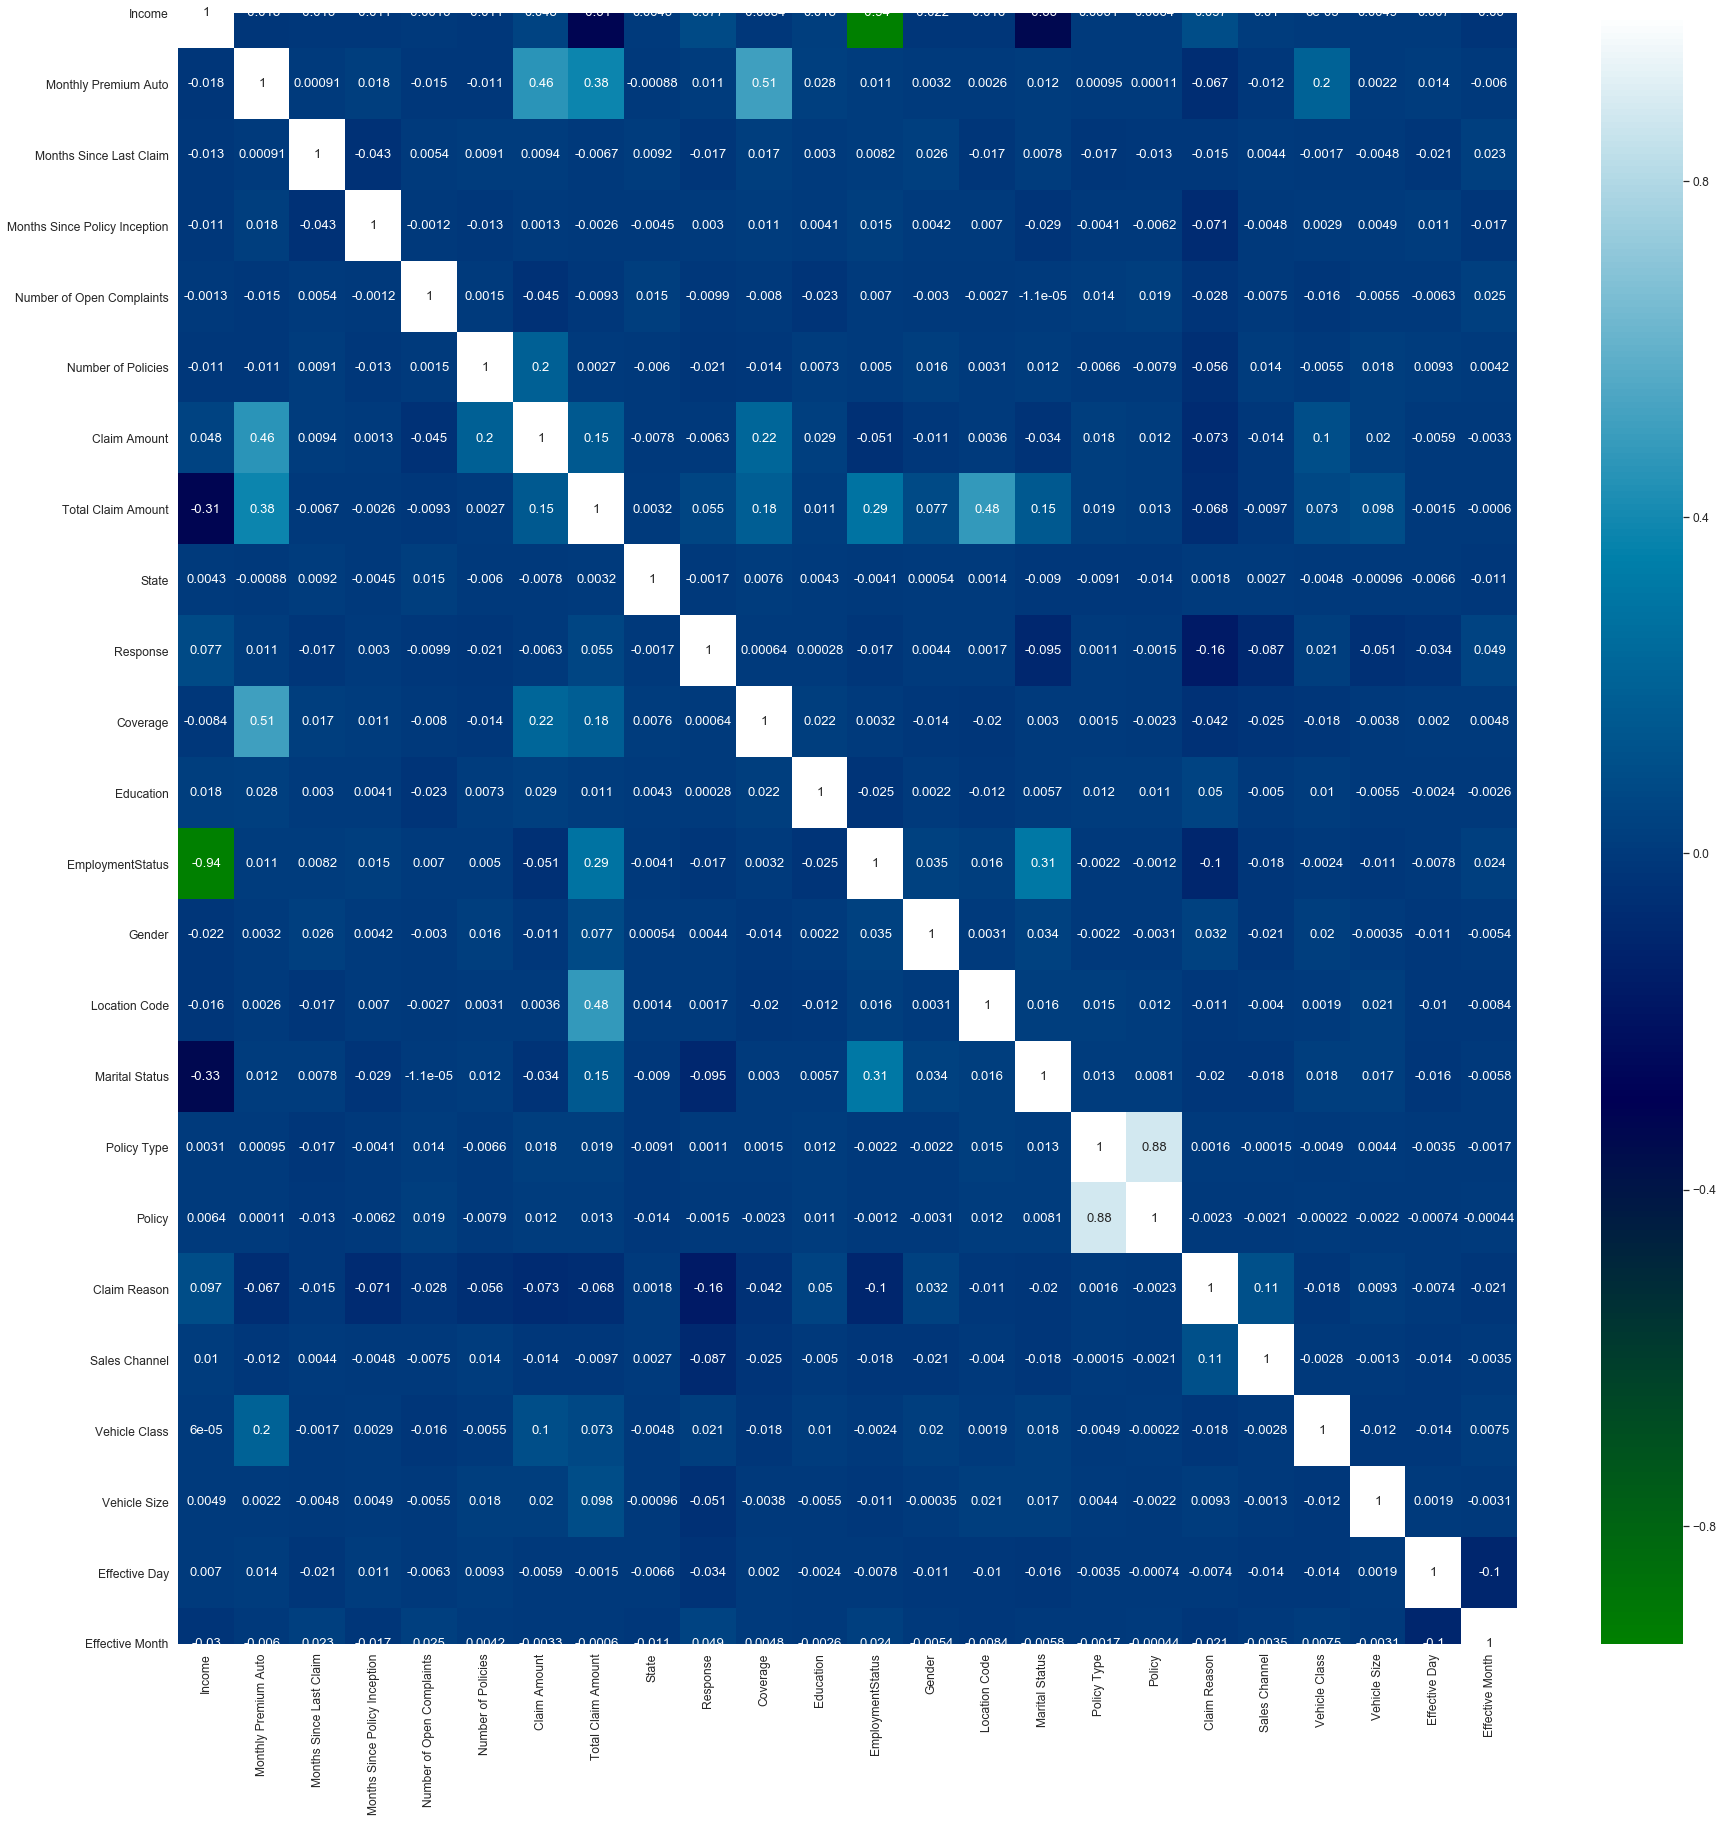

In [75]:
plt.figure(figsize=(30,30))
sns.heatmap(data_final.corr(), annot=True, cmap='ocean')

From the above we can see that most of the data are some what correlated with each other, and most of the independent features are postively correlated with our dependent features. 

In [76]:
x=data_final.drop(['Total Claim Amount'],axis=1)
x.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Claim Amount,State,Response,Coverage,...,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Effective Day,Effective Month
0,10.939763,4.234107,32,5,0,1,5.621675,1,0,0,...,1,1,0,2,0,0,5,1,2,24
1,4.605170,4.543295,13,42,0,8,6.548153,3,0,1,...,1,2,1,5,3,0,0,1,1,31
2,10.796858,4.682131,18,38,0,2,7.161423,4,0,2,...,1,1,1,5,0,0,5,1,2,19
3,4.605170,4.663439,18,65,0,7,6.639335,2,0,0,...,1,1,0,1,0,2,3,1,1,20
4,10.690489,4.290459,12,44,0,1,5.639668,1,0,0,...,0,2,1,3,0,0,0,1,2,3


In [77]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [78]:
y=data_final['Total Claim Amount']
y.head()

0    5.952753
1    7.031268
2    6.339428
3    6.272653
4    4.928202
Name: Total Claim Amount, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split,cross_val_score

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=85)

In [157]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7307, 23), (1827, 23), (7307,), (1827,))

## Lets implement ML Algorithms

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [159]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=85)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=85)
RFR=RandomForestRegressor(random_state=85)
GBR=GradientBoostingRegressor(random_state=85)

In [160]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [161]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.5093893064790902
Mean_Squared_Error = 0.3924858068153094
Mean_Absolute_Error = 0.47407444902968887
Root_Mean_Squared_Error = 0.6264868768101287
Cross_Val_Score =  0.48495207458056966


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -2.219117533774906e-05
Mean_Squared_Error = 0.8000121516306451
Mean_Absolute_Error = 0.6226721604580663
Root_Mean_Squared_Error = 0.8944339839421606
Cross_Val_Score =  -0.0010200495063356519


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize

In [162]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.509389,0.392486,0.474074,0.626487,0.484952
1,Lasso,-0.000022,0.800012,0.622672,0.894434,-0.001020
2,Ridge,0.509384,0.392490,0.474071,0.626490,0.484953
3,DecisionTreeRegressor,0.469230,0.424613,0.321205,0.651623,0.499528
4,AdaBoostRegressor,0.600524,0.319578,0.367046,0.565313,0.582567
5,RandomForestRegressor,0.772662,0.181869,0.247156,0.426461,0.734010
6,GradientBoostingRegressor,0.778680,0.177055,0.256205,0.420779,0.748033


From the above we can see that GradientBoosting Regressor and RandomForest Regressor is performing better than other models based on the given data, lets try hypertuning them with Gridsearch CV.

## Hypertunning

In [163]:
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[10,30,50,80,100,150,200,250,300],
    "max_features"     :["auto","sqrt","log2"],
    "min_samples_split":[2,4,8,10],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=10)
gFR.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=85,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True, False],
           

In [164]:
gFR.best_score_ , gFR.best_params_

(0.748035098559457,
 {'bootstrap': True,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 150})

In [169]:
RFR=RandomForestRegressor(bootstrap = True,                       
 max_features= 'sqrt',
 min_samples_split= 2,
 n_estimators= 150)

print(cross_val_score(RFR,x,y,cv=10).mean())

0.7565995959346358


From the above we can see that the after hyperparameter tunning we get crossval score from 73 to 75.

In [167]:
paramGBR={'n_estimators':[100,150,200,300,400,500], 
            'learning_rate': [0.1,0.05,0.02,0.01],
            'max_depth':[2,4,8], 
            'min_samples_leaf':[3], 
            } 
gridGBR = GridSearchCV(GBR, param_grid=paramGBR, n_jobs=1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...None,
                        

In [168]:
gridGBR.best_score_ , gridGBR.best_params_

(0.739571311243632,
 {'learning_rate': 0.05,
  'max_depth': 4,
  'min_samples_leaf': 3,
  'n_estimators': 100})

In [170]:
GBR=GradientBoostingRegressor(learning_rate= 0.05,
  max_depth= 4,
  min_samples_leaf= 3,
  n_estimators= 100)
print(cross_val_score(GBR,x,y,cv=100).mean())

0.7595189265269147


From the above we can see that the after hyperparameter tunning we get crossval score from 74 to 75.

So after hyperparameter tunning we can see that the we got the crossval score same for both models, but the accuracy score was beter with random forest regressor. So i choose random forest regressor as our final model.

In [177]:
from sklearn.externals import joblib
joblib.dump(gFR,'Auto_Insurance_Claims_Prediction.obj')

['Auto_Insurance_Claims_Prediction.obj']

In [178]:
model=joblib.load('Auto_Insurance_Claims_Prediction.obj')

In [180]:
prediction=model.predict(x_test)

In [181]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Auto_Insurance_Claims_prediction_results.csv")